# Binary 


In [1]:
import pandas as pd

# Load the dataset
file_path = 'dataV2_cohortV3.csv'  # Update the file path as needed
data = pd.read_csv(file_path)

# Subset the desired columns
subset_data = data[['LONELY_direct', 'CONNECTION_activities_text_or_messaged_p3m']]
cleaned_data = subset_data.dropna(subset=['LONELY_direct', 'CONNECTION_activities_text_or_messaged_p3m'])


In [2]:
cleaned_data

,LONELY_direct,CONNECTION_activities_text_or_messaged_p3m
0,Rarely (e.g. less than 1 day),Weekly
1,Some or a little of the time (e.g. 1-2 days),Weekly
2,"None of the time (e.g., 0 days)",A few times a week
3,Some or a little of the time (e.g. 1-2 days),A few times a month
4,"None of the time (e.g., 0 days)",Weekly
...,...,...
845,Occasionally or a moderate amount of time (e.g...,Less than monthly
846,Some or a little of the time (e.g. 1-2 days),Weekly
847,All of the time (e.g. 5-7 days)],Daily or almost daily
848,Occasionally or a moderate amount of time (e.g...,Daily or almost daily


In [3]:
X = cleaned_data['CONNECTION_activities_text_or_messaged_p3m']  # Independent variables
y = cleaned_data['LONELY_direct']  # Dependent variable

In [4]:
y.value_counts()

LONELY_direct
Rarely (e.g. less than 1 day)                                199
None of the time (e.g., 0 days)                              185
Some or a little of the time (e.g. 1-2 days)                 184
Occasionally or a moderate amount of time (e.g. 3-4 days)    164
All of the time (e.g. 5-7 days)]                              83
Name: count, dtype: int64

In [5]:
X.value_counts()

CONNECTION_activities_text_or_messaged_p3m
A few times a month             149
A few times a week              129
Weekly                          123
Less than monthly               123
Not in the past three months    106
Daily or almost daily            98
Monthly                          87
Name: count, dtype: int64

In [6]:
cleaned_data.loc[cleaned_data.LONELY_direct == 'None of the time (e.g., 0 days)', 'LONELY_direct'] = "Never"
cleaned_data.loc[cleaned_data.LONELY_direct == 'Rarely (e.g. less than 1 day)', 'LONELY_direct'] = "Felt Lonely"
cleaned_data.loc[cleaned_data.LONELY_direct == 'Some or a little of the time (e.g. 1-2 days)', 'LONELY_direct'] = "Felt Lonely"
cleaned_data.loc[cleaned_data.LONELY_direct == 'Occasionally or a moderate amount of time (e.g. 3-4 days)', 'LONELY_direct'] = "Felt Lonely"
cleaned_data.loc[cleaned_data.LONELY_direct == 'All of the time (e.g. 5-7 days)]', 'LONELY_direct'] = "Felt Lonely"

/tmp/ipykernel_281/259748798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[cleaned_data.LONELY_direct == 'None of the time (e.g., 0 days)', 'LONELY_direct'] = "Never"
/tmp/ipykernel_281/259748798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[cleaned_data.LONELY_direct == 'Rarely (e.g. less than 1 day)', 'LONELY_direct'] = "Felt Lonely"
/tmp/ipykernel_281/259748798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [7]:
y.value_counts()

LONELY_direct
Felt Lonely    630
Never          185
Name: count, dtype: int64

In [8]:
X.value_counts()

CONNECTION_activities_text_or_messaged_p3m
A few times a month             149
A few times a week              129
Weekly                          123
Less than monthly               123
Not in the past three months    106
Daily or almost daily            98
Monthly                          87
Name: count, dtype: int64

In [9]:
cleaned_data

,LONELY_direct,CONNECTION_activities_text_or_messaged_p3m
0,Felt Lonely,Weekly
1,Felt Lonely,Weekly
2,Never,A few times a week
3,Felt Lonely,A few times a month
4,Never,Weekly
...,...,...
845,Felt Lonely,Less than monthly
846,Felt Lonely,Weekly
847,Felt Lonely,Daily or almost daily
848,Felt Lonely,Daily or almost daily


In [10]:
cleaned_data['LONELY_direct_encoded'] = cleaned_data['LONELY_direct'].map({'Felt Lonely': 1, 'Never': 0})
cleaned_data['LONELY_direct_encoded'] = cleaned_data['LONELY_direct'].map({'Felt Lonely': 1, 'Never': 0})
ordered_categories = [
    "Not in the past three months",
    "Less than monthly",
    "Monthly",
    "A few times a month",
    "Weekly",
    "A few times a week",
    "Daily or almost daily"
]

cleaned_data['CONNECTION_activities_text_or_messaged_p3m_encoded'] = cleaned_data['CONNECTION_activities_text_or_messaged_p3m'].map(
    {cat: i for i, cat in enumerate(ordered_categories)}
)

/tmp/ipykernel_281/2806734450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['LONELY_direct_encoded'] = cleaned_data['LONELY_direct'].map({'Felt Lonely': 1, 'Never': 0})
/tmp/ipykernel_281/2806734450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['LONELY_direct_encoded'] = cleaned_data['LONELY_direct'].map({'Felt Lonely': 1, 'Never': 0})
/tmp/ipykernel_281/2806734450.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [11]:
cleaned_data

,LONELY_direct,CONNECTION_activities_text_or_messaged_p3m,LONELY_direct_encoded,CONNECTION_activities_text_or_messaged_p3m_encoded
0,Felt Lonely,Weekly,1,4
1,Felt Lonely,Weekly,1,4
2,Never,A few times a week,0,5
3,Felt Lonely,A few times a month,1,3
4,Never,Weekly,0,4
...,...,...,...,...
845,Felt Lonely,Less than monthly,1,1
846,Felt Lonely,Weekly,1,4
847,Felt Lonely,Daily or almost daily,1,6
848,Felt Lonely,Daily or almost daily,1,6


In [12]:
import statsmodels.formula.api as smf
model = smf.ols("LONELY_direct_encoded ~ CONNECTION_activities_text_or_messaged_p3m", data=cleaned_data)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     LONELY_direct_encoded   R-squared:                       0.019
Model:                               OLS   Adj. R-squared:                  0.012
Method:                    Least Squares   F-statistic:                     2.585
Date:                   Sun, 24 Nov 2024   Prob (F-statistic):             0.0174
Time:                           19:52:56   Log-Likelihood:                -439.52
No. Observations:                    815   AIC:                             893.0
Df Residuals:                        808   BIC:                             926.0
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      0.7919      0.034     23.198      0.000       0.725       0.859
CONNECTION_activities_text_or_messaged_p3m[T.A few times a week]              -0.0090      0.050     -0.180      0.858      -0.107       0.089
CONNECTION_activities_text_or_messaged_p3m[T.Daily or almost daily]           -0.0164      0.054     -0.303      0.762      -0.123       0.090
CONNECTION_activities_text_or_messaged_p3m[T.Less than monthly]                0.0455      0.051      0.895      0.371      -0.054       0.145
CONNECTION_activities_text_or_messaged_p3m[T.Monthly]                          0.0586      0.056      1.043      0.297      -0.052       0.169
CONNECTION_activities_text_or_messaged_p3m[T.Not in the past three months]    -0.0938      0.053     -1.772      0.077      -0.198       0.010
CONNECTION_activities_text_or_messaged_p3m[T.Weekly]                          -0.1090      0.051     -2.147      0.032      -0.209      -0.009
==============================================================================
Omnibus:                      142.512   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.956
Skew:                          -1.267   Prob(JB):                     1.05e-48
Kurtosis:                       2.716   Cond. No.                         7.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

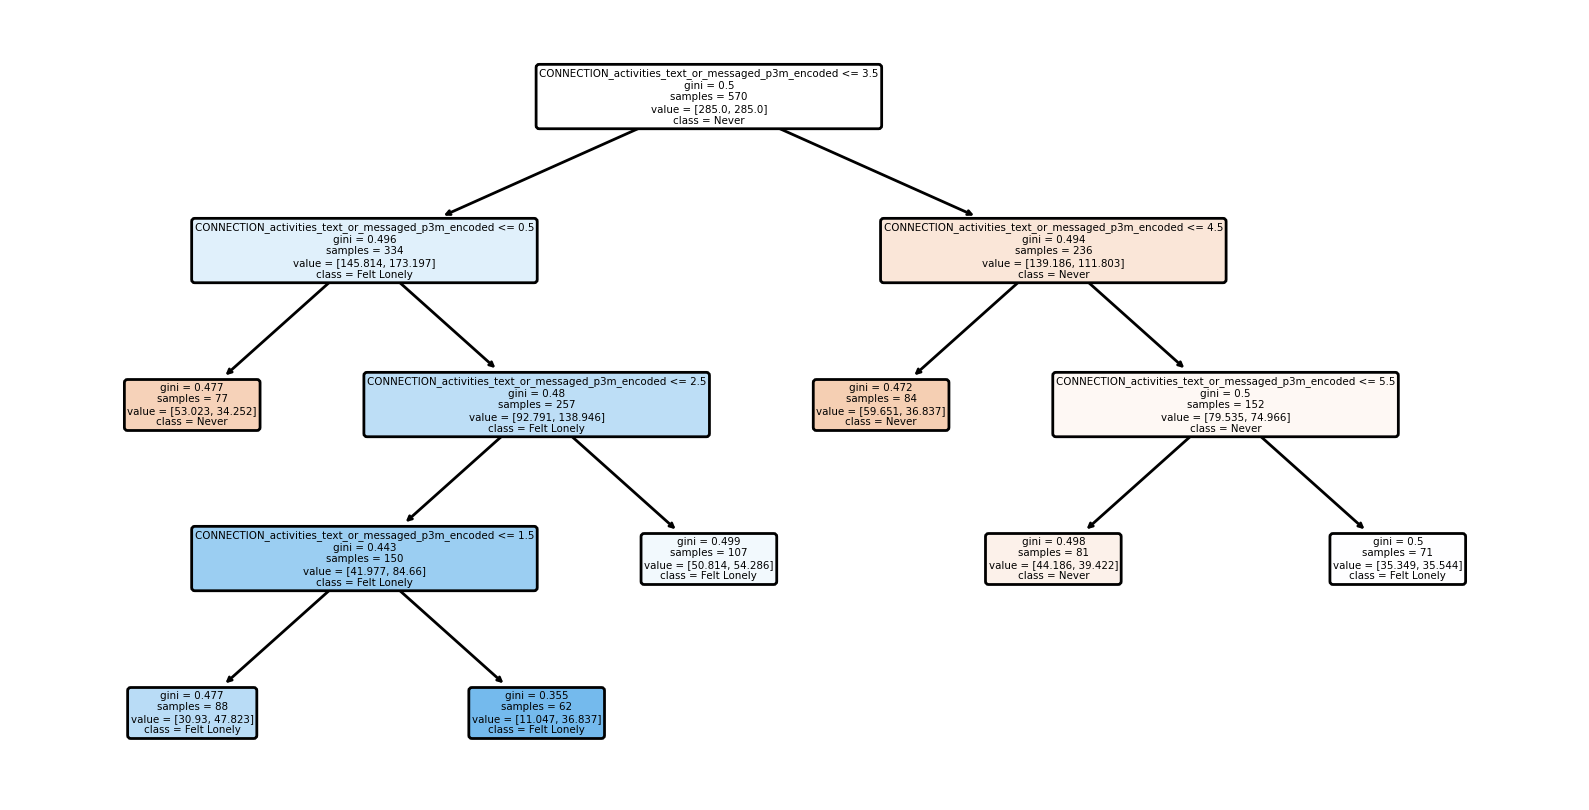

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = cleaned_data[['CONNECTION_activities_text_or_messaged_p3m_encoded']]
y = cleaned_data['LONELY_direct_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier with class_weight='balanced'
clf = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Visualize the decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 5), dpi=200)
plot_tree(
    clf,
    feature_names=['CONNECTION_activities_text_or_messaged_p3m_encoded'],
    class_names=['Never', 'Felt Lonely'],
    filled=True,
    rounded=True
)
plt.show()


# Each option assigned a value 

In [14]:
df = pd.read_csv(file_path)

In [15]:
data_use = df.copy()

In [16]:
X = df['CONNECTION_activities_text_or_messaged_p3m']  # Independent variables
y = df['LONELY_direct']  # Dependent variable

In [17]:
y.value_counts()


LONELY_direct
Rarely (e.g. less than 1 day)                                199
Some or a little of the time (e.g. 1-2 days)                 185
None of the time (e.g., 0 days)                              185
Occasionally or a moderate amount of time (e.g. 3-4 days)    164
All of the time (e.g. 5-7 days)]                              83
Name: count, dtype: int64

In [18]:
y_map_dict = {
    'None of the time (e.g., 0 days)': 0,
    'Rarely (e.g. less than 1 day)': 0.5,
    'Some or a little of the time (e.g. 1-2 days)' : 1.5,
    'Occasionally or a moderate amount of time (e.g. 3-4 days)': 3.5,
    'All of the time (e.g. 5-7 days)]': 6
}

y = y.replace(y_map_dict.keys(), y_map_dict.values())

In [19]:
y

0      0.5
1      1.5
2      0.0
3      1.5
4      0.0
      ... 
845    3.5
846    1.5
847    6.0
848    3.5
849    1.5
Name: LONELY_direct, Length: 850, dtype: float64

In [20]:
# Handle missing values
X.dropna()
y.dropna()

0      0.5
1      1.5
2      0.0
3      1.5
4      0.0
      ... 
845    3.5
846    1.5
847    6.0
848    3.5
849    1.5
Name: LONELY_direct, Length: 816, dtype: float64

In [21]:
ordered_categories = [
    "Not in the past three months",
    "Less than monthly",
    "Monthly",
    "A few times a month",
    "Weekly",
    "A few times a week",
    "Daily or almost daily"
]


new_df = pd.DataFrame(data={"LONELY_direct": y, "CONNECTION_activities_text_or_messaged_p3m": X})


new_df['CONNECTION_activities_text_or_messaged_p3m'] = pd.Categorical(
    new_df['CONNECTION_activities_text_or_messaged_p3m'],
    categories=ordered_categories,
    ordered=True
)


new_df

,LONELY_direct,CONNECTION_activities_text_or_messaged_p3m
0,0.5,Weekly
1,1.5,Weekly
2,0.0,A few times a week
3,1.5,A few times a month
4,0.0,Weekly
...,...,...
845,3.5,Less than monthly
846,1.5,Weekly
847,6.0,Daily or almost daily
848,3.5,Daily or almost daily


In [22]:
import statsmodels.formula.api as smf



model = smf.ols("LONELY_direct ~ CONNECTION_activities_text_or_messaged_p3m", data=new_df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          LONELY_direct   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.686
Date:                Sun, 24 Nov 2024   Prob (F-statistic):              0.121
Time:                        19:53:06   Log-Likelihood:                -1667.2
No. Observations:                 815   AIC:                             3348.
Df Residuals:                     808   BIC:                             3381.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                               1.9623      0.183     10.749      0.000       1.604       2.321
CONNECTION_activities_text_or_messaged_p3m[T.Less than monthly]         0.1028      0.249      0.413      0.680      -0.386       0.592
CONNECTION_activities_text_or_messaged_p3m[T.Monthly]                  -0.0312      0.272     -0.115      0.909      -0.565       0.502
CONNECTION_activities_text_or_messaged_p3m[T.A few times a month]      -0.1905      0.239     -0.797      0.425      -0.659       0.278
CONNECTION_activities_text_or_messaged_p3m[T.Weekly]                   -0.4379      0.249     -1.758      0.079      -0.927       0.051
CONNECTION_activities_text_or_messaged_p3m[T.A few times a week]       -0.4894      0.246     -1.986      0.047      -0.973      -0.006
CONNECTION_activities_text_or_messaged_p3m[T.Daily or almost daily]    -0.1663      0.263     -0.632      0.528      -0.683       0.351
==============================================================================
Omnibus:                      101.545   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.902
Skew:                           1.018   Prob(JB):                     2.53e-31
Kurtosis:                       2.956   Cond. No.                         8.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""